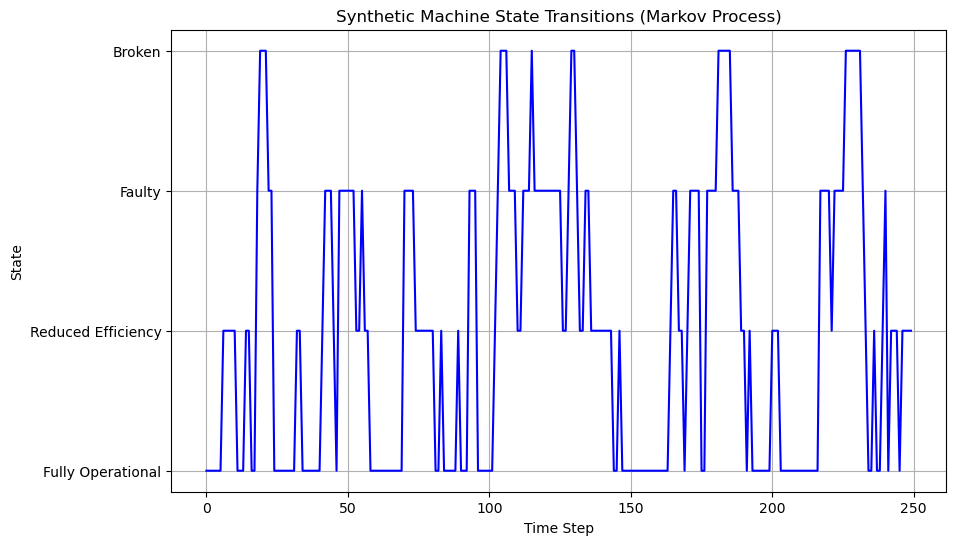

SYNTHETIC SEQUENCE
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 3, 3, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 3, 3, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1]

Estimated Transition Probabilities from Synthetic Data:
[[0.79047619 0.15238095 0.05714286 0.        ]
 [0.28333333 0.55       0.16666667 0.        ]
 [0.0625     0.1875     0.65625    0.09375   ]
 [0.         0.         0.3     

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
transition_matrix = np.array([
    [0.7, 0.2, 0.1, 0.0],  # Transitions from State 1
    [0.3, 0.5, 0.2, 0.0],  # Transitions from State 2
    [0.1, 0.2, 0.6, 0.1],  # Transitions from State 3
    [0.0, 0.1, 0.2, 0.7]   # Transitions from State 4
])

def generate_markov_sequence(initial_state, num_steps, transition_matrix):
    sequence = [initial_state]
    
    for _ in range(num_steps - 1):
        current_state = sequence[-1]
        next_state = np.random.choice([0, 1, 2, 3], p=transition_matrix[current_state])
        sequence.append(next_state)
    
    return sequence

# Generate a synthetic sequence starting from State 0 (Fully Operational)
num_steps = 250
initial_state = 0  # Starting from 'Fully Operational'
synthetic_sequence = generate_markov_sequence(initial_state, num_steps, transition_matrix)

states = ['Fully Operational', 'Reduced Efficiency', 'Faulty', 'Broken']
# Plotting the synthetic sequence
plt.figure(figsize=(10, 6))
plt.plot(synthetic_sequence, label='Machine State', color='b')
plt.yticks([0, 1, 2, 3], states)
plt.xlabel('Time Step')
plt.ylabel('State')
plt.title('Synthetic Machine State Transitions (Markov Process)')
plt.grid(True)
plt.show()

print("SYNTHETIC SEQUENCE")
print(synthetic_sequence)
print()
# Count transitions in the synthetic sequence
transition_counts = np.zeros((4, 4))  # 4x4 matrix to count transitions

for i in range(len(synthetic_sequence) - 1):
    current_state = synthetic_sequence[i]
    next_state = synthetic_sequence[i + 1]
    transition_counts[current_state, next_state] += 1

# Normalize to get the probabilities
transition_probabilities = transition_counts / transition_counts.sum(axis=1, keepdims=True)

print("Estimated Transition Probabilities from Synthetic Data:")
print(transition_probabilities)
print()

# Define the transition matrix
P = np.array([
    [0.7, 0.2, 0.05, 0.05],  # Transitions from State 1
    [0.3, 0.5, 0.2, 0.0],  # Transitions from State 2
    [0.1, 0.2, 0.6, 0.1],  # Transitions from State 3
    [0.0, 0.1, 0.2, 0.7]   # Transitions from State 4
])

# To calculate the steady-state probabilities, we solve (pi * P = pi)
# This is equivalent to solving (pi * (P - I) = 0), where I is the identity matrix.
# Create the system of linear equations (P - I)
A = P.T - np.eye(4)
# Append the constraint (pi_1 + pi_2 + pi_3 + pi_4 = 1)
A = np.vstack([A, np.ones(4)])
# The right-hand side is 0 for the first 4 rows (for the equation pi * P = pi),
# and 1 for the last row (for the sum constraint).
b = np.array([0, 0, 0, 0, 1])
steady_state_probabilities = np.linalg.lstsq(A, b, rcond=None)[0]
print("Steady-state probabilities:", steady_state_probabilities)



# INTERPRETATION 

### If you look at the graphs the major transtions are between Fully operatiosnal and reduced efficiency  this implies that the system is not fully operations in most of the time , suggest that system needs 
### some maintainanc to be kept in fully operationsal so this say you need to monitor the factors which actually make the system goes to reduced efficiency from fully operational
### The Frequent shifts between Fully Operational and Reduced Efficiency suggest that the machine is constantly experiencing slight degradation or minor issues. This could be indicative of a system that operates at a lower efficiency periodically but isn't failing completely.
